<a href="https://colab.research.google.com/github/dudubouneto/Disc_FluxoVacinacao/blob/main/Faixas_de_Popula%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

## Discretização já existente (c/erros)


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Discretização das variáveis/Data/Dados_IBGE_Faixas_de_Populacao_cpy.csv')
data.head()

,Municipio,area,Populacao_Estimada,Densidade_Demográfica,Escolarizacao_6_14_anos,IDHM,Mortalidade_Infantil,Receitas_Realizadas,Despesas_empenhadas,PIB,Faixa_Populacao
0,ADAMANTINA,411.987,35111,82.15,97.6,790,11.63,16.071.867.925,13.708.366.993,30962.66,População entre 20000 e 50000 habitantes
1,ADOLFO,211.055,3554,16.85,98.6,730,19.23,2.733.374.731,2.010.387.713,25867.75,População entre 2000 e 5000 habitantes
2,AGUAÍ,474.554,36648,67.72,95.8,715,16.06,8.409.476.006,7.216.873.408,28041.03,População entre 20000 e 50000 habitantes
3,ÁGUAS DA PRATA,142.673,8221,53.05,98.8,781,25.32,2.939.024.814,2.436.340.149,20683.88,População entre 5000 e 10000 habitantes
4,ÁGUAS DE LINDÓIA,60.126,18808,287.16,96.2,745,8.37,8.694.922.213,7.520.147.793,26427.34,População entre 10000 e 20000 habitantes


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Municipio                645 non-null    object 
 1   area                     645 non-null    object 
 2   Populacao_Estimada       645 non-null    int64  
 3   Densidade_Demográfica    645 non-null    float64
 4   Escolarizacao_6_14_anos  645 non-null    float64
 5   IDHM                     645 non-null    int64  
 6   Mortalidade_Infantil     645 non-null    object 
 7   Receitas_Realizadas      645 non-null    object 
 8   Despesas_empenhadas      645 non-null    object 
 9   PIB                      645 non-null    float64
 10  Faixa_Populacao          645 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 55.6+ KB


In [ ]:
data['Faixa_Populacao'].value_counts().shape

(18,)

Ao todo, temos **18 'bins'**, vamos ver como é o histograma dessa distribuição:

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

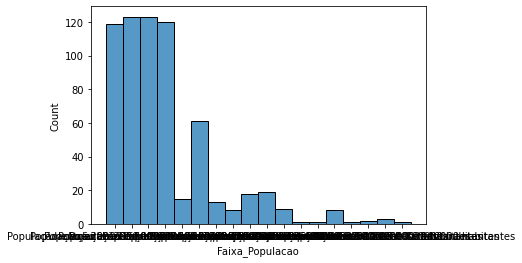

In [ ]:
sns.histplot(data=data['Faixa_Populacao'])

Como é difícil visualizar o nome de cada faixa, vamos representar cada intervalo por seu 'limite superior'

In [ ]:
data['Faixa_Populacao_short'] = data['Faixa_Populacao'].apply(lambda faixa: faixa.split()[-2])

In [ ]:
data['Faixa_Populacao_short']

0       50000
1        5000
2       50000
3       10000
4       20000
        ...  
640    125000
641       que
642      5000
643     20000
644     20000
Name: Faixa_Populacao_short, Length: 645, dtype: object

In [ ]:
data['Faixa_Populacao'].value_counts()

População entre 5000 e 10000 habitantes         123
População entre 2000 e 5000 habitantes          123
População entre 10000 e 20000 habitantes        120
População entre 20000 e 50000 habitantes        119
População maior que 1600000                      61
População entre 100000 e 125000 habitantes       19
População entre 1000 e 2000 habitantes           18
População entre 200000 e 300000 habitantes       15
População entre 150000 e 200000 habitantes       13
População entre 300000 e 400000 habitantes        9
População entre 125000 e 150000 habitantes        8
População entre 400000 e 500000 habitantes        8
População entre 700000 e 800000 habitantes        3
População entre 600000 e 700000 habitantes        2
População menor que 1000 habitantes               1
População entre 1200000 e 1300000 habitantes      1
População entre 1300000 e 1400000 habitantes      1
População entre 800000 e 900000 habitantes        1
Name: Faixa_Populacao, dtype: int64

Os municípios com mais de 1600000 habitantes ficam com o nome 'que' por essa função. Vamos corrigir isso:

In [ ]:
data.loc[data['Faixa_Populacao_short'] == 'que', 'Faixa_Populacao_short'] = '>1600000'
print('Total de categorias:' , data['Faixa_Populacao_short'].value_counts().shape[0])
data['Faixa_Populacao_short'].value_counts()
# correção do nome da faixa ok

Total de categorias: 18


10000       123
5000        123
20000       120
50000       119
>1600000     61
125000       19
2000         18
300000       15
200000       13
400000        9
150000        8
500000        8
800000        3
700000        2
1000          1
1300000       1
1400000       1
900000        1
Name: Faixa_Populacao_short, dtype: int64

In [ ]:
data[data['Faixa_Populacao'] == 'População maior que 1600000']
# mtos municípios com menos de 1600000 hab. estão listados na categoria '>1600000'...

,Municipio,area,Populacao_Estimada,Densidade_Demográfica,Escolarizacao_6_14_anos,IDHM,Mortalidade_Infantil,Receitas_Realizadas,Despesas_empenhadas,PIB,Faixa_Populacao,Faixa_Populacao_short
21,AMPARO,445.323,72677,147.75,95.7,785,5.65,26.229.966.169,24.072.795.422,64804.88,População maior que 1600000,>1600000
23,ANDRADINA,964.226,57202,57.39,98.2,779,13.35,16.695.527.105,14.735.321.707,33661.69,População maior que 1600000,>1600000
43,ARTUR NOGUEIRA,178.026,55340,248.15,98.3,749,7.36,1.516.913.716,141.937.105,22156.59,População maior que 1600000,>1600000
44,ARUJÁ,96.167,91157,779.33,98.2,784,16.32,28.527.824.609,24.738.693.664,69588.09,População maior que 1600000,>1600000
51,AVARÉ,1.213.055,91232,68.37,97.9,767,11.49,31.271.850.318,27.855.738.041,30391.62,População maior que 1600000,>1600000
...,...,...,...,...,...,...,...,...,...,...,...,...
616,TUPÃ,627.986,65570,100.99,97.3,771,15.03,15.810.832.831,14.530.654.681,27412.94,População maior que 1600000,>1600000
621,UBATUBA,708.105,91824,108.87,97.7,751,14.15,31.508.335.965,29.815.669.047,23826.80,População maior que 1600000,>1600000
633,VARGEM GRANDE PAULISTA,42.489,53468,1012.10,97.2,770,8.11,16.189.361.096,14.051.841.277,40282.68,População maior que 1600000,>1600000
636,VINHEDO,81.604,80111,779.51,97.5,817,9.50,46.851.238.042,41.835.627.866,119996.43,População maior que 1600000,>1600000


###Histograma da distribuição original <br>
Primeiro, vamos ordenar as faixas p/facilitar a visualização do histograma. Isso é feito transformando os dados da coluna ```'Faixa_Populacao_short'``` no tipo ```Categorical```.

In [ ]:
data['Faixa_Populacao_short'] = pd.Categorical(data['Faixa_Populacao_short'], ['1000', '2000', '5000', '10000', '20000', '50000', '125000', '150000', '200000', '300000', '400000', '500000', '700000', '800000', '900000', '1300000', '1400000', '>1600000'], ordered=True)

In [ ]:
data['Faixa_Populacao_short'].dtype

CategoricalDtype(categories=['1000', '2000', '5000', '10000', '20000', '50000', '125000',
                  '150000', '200000', '300000', '400000', '500000', '700000',
                  '800000', '900000', '1300000', '1400000', '>1600000'],
, ordered=True)

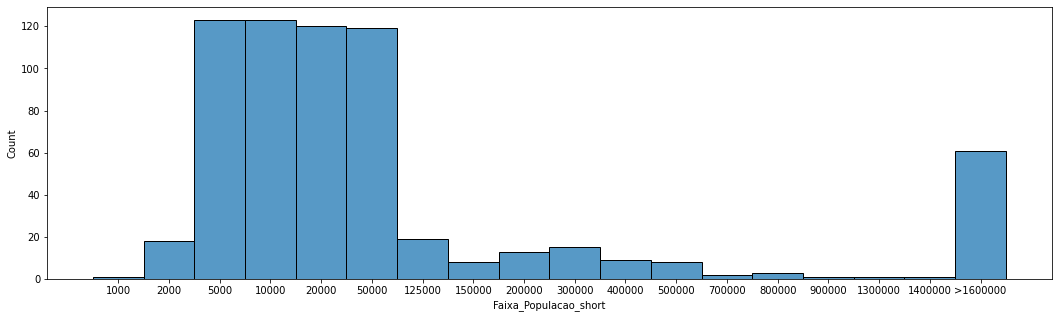

In [ ]:
plt.figure(figsize=(18,5))
sns.histplot(data=data['Faixa_Populacao_short'])

##Faixas de população usadas pelo SEADE Informa

https://populacao.seade.gov.br/wp-content/uploads/sites/8/2022/04/Seade-Informa-demografia-concentracao-populacao-municipios-2022.pdf

###Discretização

In [ ]:
# recarregando o df
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Discretização das variáveis/Data/Dados_IBGE_Faixas_de_Populacao_cpy.csv')
data.head()

,Municipio,area,Populacao_Estimada,Densidade_Demográfica,Escolarizacao_6_14_anos,IDHM,Mortalidade_Infantil,Receitas_Realizadas,Despesas_empenhadas,PIB,Faixa_Populacao
0,ADAMANTINA,411.987,35111,82.15,97.6,790,11.63,16.071.867.925,13.708.366.993,30962.66,População entre 20000 e 50000 habitantes
1,ADOLFO,211.055,3554,16.85,98.6,730,19.23,2.733.374.731,2.010.387.713,25867.75,População entre 2000 e 5000 habitantes
2,AGUAÍ,474.554,36648,67.72,95.8,715,16.06,8.409.476.006,7.216.873.408,28041.03,População entre 20000 e 50000 habitantes
3,ÁGUAS DA PRATA,142.673,8221,53.05,98.8,781,25.32,2.939.024.814,2.436.340.149,20683.88,População entre 5000 e 10000 habitantes
4,ÁGUAS DE LINDÓIA,60.126,18808,287.16,96.2,745,8.37,8.694.922.213,7.520.147.793,26427.34,População entre 10000 e 20000 habitantes


In [ ]:
data.drop('Faixa_Populacao', axis=1, inplace=True)
data.head()

,Municipio,area,Populacao_Estimada,Densidade_Demográfica,Escolarizacao_6_14_anos,IDHM,Mortalidade_Infantil,Receitas_Realizadas,Despesas_empenhadas,PIB
0,ADAMANTINA,411.987,35111,82.15,97.6,790,11.63,16.071.867.925,13.708.366.993,30962.66
1,ADOLFO,211.055,3554,16.85,98.6,730,19.23,2.733.374.731,2.010.387.713,25867.75
2,AGUAÍ,474.554,36648,67.72,95.8,715,16.06,8.409.476.006,7.216.873.408,28041.03
3,ÁGUAS DA PRATA,142.673,8221,53.05,98.8,781,25.32,2.939.024.814,2.436.340.149,20683.88
4,ÁGUAS DE LINDÓIA,60.126,18808,287.16,96.2,745,8.37,8.694.922.213,7.520.147.793,26427.34


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Municipio                645 non-null    object 
 1   area                     645 non-null    object 
 2   Populacao_Estimada       645 non-null    int64  
 3   Densidade_Demográfica    645 non-null    float64
 4   Escolarizacao_6_14_anos  645 non-null    float64
 5   IDHM                     645 non-null    int64  
 6   Mortalidade_Infantil     645 non-null    object 
 7   Receitas_Realizadas      645 non-null    object 
 8   Despesas_empenhadas      645 non-null    object 
 9   PIB                      645 non-null    float64
dtypes: float64(3), int64(2), object(5)
memory usage: 50.5+ KB


In [ ]:
bins = [0,9999,49999, 99999, 499999, data['Populacao_Estimada'].max()]
labels = ['ate 9999', '10000 a 49999', '50000 a 99999', '100000 a 499999', '>500000']
data['Faixa_Populacional'] = pd.cut(data['Populacao_Estimada'], bins=bins, labels=labels)

In [ ]:
data.head()

,Municipio,area,Populacao_Estimada,Densidade_Demográfica,Escolarizacao_6_14_anos,IDHM,Mortalidade_Infantil,Receitas_Realizadas,Despesas_empenhadas,PIB,Faixa_Populacional
0,ADAMANTINA,411.987,35111,82.15,97.6,790,11.63,16.071.867.925,13.708.366.993,30962.66,10000 a 49999
1,ADOLFO,211.055,3554,16.85,98.6,730,19.23,2.733.374.731,2.010.387.713,25867.75,ate 9999
2,AGUAÍ,474.554,36648,67.72,95.8,715,16.06,8.409.476.006,7.216.873.408,28041.03,10000 a 49999
3,ÁGUAS DA PRATA,142.673,8221,53.05,98.8,781,25.32,2.939.024.814,2.436.340.149,20683.88,ate 9999
4,ÁGUAS DE LINDÓIA,60.126,18808,287.16,96.2,745,8.37,8.694.922.213,7.520.147.793,26427.34,10000 a 49999


In [ ]:
data['Faixa_Populacional'].dtype

CategoricalDtype(categories=['ate 9999', '10000 a 49999', '50000 a 99999',
                  '100000 a 499999', '>500000'],
, ordered=True)

### Histograma da distribuição

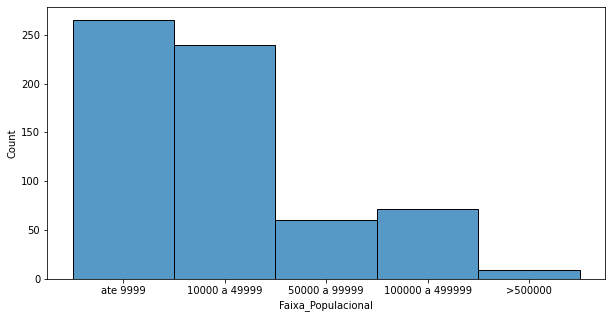

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(data=data['Faixa_Populacional'])

#Discretização com base na classificação de cidades por tamanho do IPEA


[Artigo](https://web.archive.org/web/20090819081149/http://www.ipea.gov.br/003/00301009.jsp?ttCD_CHAVE=5499)

###Discretização

In [ ]:
# recarregando o df
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Discretização das variáveis/Data/final_novo_ibge_sp - final_novo_ibge_sp_cpy.csv')
data.head() 

,Município,Codigo_IBGE,Gentílico,Prefeito,Área Territorial,População Estimada,Densidade Demográfica,Escolarização 6 a 14 anos,IDHM,Mortalidade Infantil,Receitas Realizadas,Despesas empenhadas,PIB per capita,Latitude,Longitude,Postos vacinação,Hospitais,Médicos
0,ADAMANTINA,3500105,adamantinense,MARCIO CARDIM,412,35111,"82,15","97,6",790,"11,63","16,071,867,925","13,708,366,993","30962,66",-22,-511,4,0,0
1,ADOLFO,3500204,adolfino,IZAEL ANTONIO FERNANDES,211,3554,"16,85","98,6",730,"19,23","2,733,374,731","2,010,387,713","25867,75",-212,-496,1,0,0
2,AGUAÍ,3500303,aguaiano,JOSÉ ALEXANDRE PEREIRA DE ARAÚJO,475,36648,"67,72","95,8",715,"16,06","8,409,476,006","7,216,873,408","28041,03",-221,-470,5,0,0
3,ÁGUAS DA PRATA,3500402,pratense,REGINA HELENA JANIZELO MORAES,143,8221,"53,05","98,8",781,"25,32","2,939,024,814","2,436,340,149","20683,88",-219,-467,1,0,0
4,ÁGUAS DE LINDÓIA,3500501,lindoiense,GILBERTO ABDOU HELOU,60,18808,"287,16","96,2",745,"8,37","8,694,922,213","7,520,147,793","26427,34",-225,-466,4,0,0


In [ ]:
data = data[['Município', 'Codigo_IBGE', 'População Estimada']]
data.head()

,Município,Codigo_IBGE,População Estimada
0,ADAMANTINA,3500105,35111
1,ADOLFO,3500204,3554
2,AGUAÍ,3500303,36648
3,ÁGUAS DA PRATA,3500402,8221
4,ÁGUAS DE LINDÓIA,3500501,18808


In [ ]:
bins = [0, 50000, 100000, 300000, 500000, data['População Estimada'].max()]
labels = ['Cidade pequena', 'Cidade média-pequena', 'Cidade média', 'Cidade média-grande', 'Cidade grande']
data['Classificação Cidade'] = pd.cut(data['População Estimada'], bins=bins, labels=labels)
data

,Município,Codigo_IBGE,População Estimada,Classificação Cidade
0,ADAMANTINA,3500105,35111,Cidade pequena
1,ADOLFO,3500204,3554,Cidade pequena
2,AGUAÍ,3500303,36648,Cidade pequena
3,ÁGUAS DA PRATA,3500402,8221,Cidade pequena
4,ÁGUAS DE LINDÓIA,3500501,18808,Cidade pequena
...,...,...,...,...
640,VOTORANTIM,3557006,123599,Cidade média
641,VOTUPORANGA,3557105,95338,Cidade média-pequena
642,ZACARIAS,3557154,2752,Cidade pequena
643,CHAVANTES,3557204,12418,Cidade pequena


###Histograma da distribuição

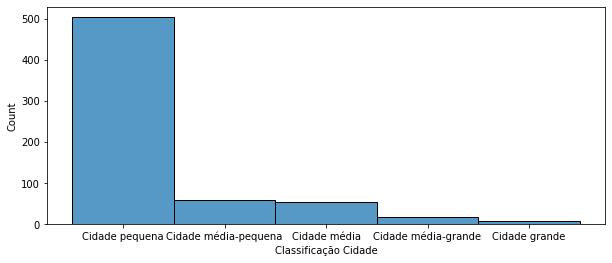

In [ ]:
plt.figure(figsize=(10,4))
sns.histplot(data=data['Classificação Cidade'])